# Hold out

In [11]:
# %load imports.py
%load_ext autoreload
%autoreload 2
%reload_kedro
%config Completer.use_jedi = False  ## (To fix autocomplete)

import pandas as pd
pd.options.display.max_rows = 100
from src.models.vmm import ModelSimulator
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams["figure.figsize"] = (10,10)
plt.style.use('presentation')
from src.visualization.plot import track_plots, plot, captive_plot
import kedro
import numpy as np
import os.path
import anyconfig


from myst_nb import glue
from src.symbols import *
import src.symbols as symbols
from src.system_equations import *

from IPython.display import display, Math, Latex, Markdown
from sympy.physics.vector.printing import vpprint, vlatex

from src.models.regression import MotionRegression

from src.parameters import df_parameters
p = df_parameters["symbol"]

# Read configs:
conf_path = os.path.join("../../conf/base/")
runs_globals_path = os.path.join(
    conf_path,
    "runs_globals.yml",
)

runs_globals = anyconfig.load(runs_globals_path)
model_test_ids = runs_globals["model_test_ids"]

join_globals_path = os.path.join(
    conf_path,
    "join_globals.yml",
)

joins = runs_globals["joins"]
join_runs_dict = anyconfig.load(join_globals_path)

globals_path = os.path.join(
    conf_path,
    "globals.yml",
)
global_variables = anyconfig.load(globals_path)



vmm_names = global_variables["vmms"]
vmm_names.remove('vmm_linear')

only_joined = global_variables[
    "only_joined"
]  # (regress/predict with only models from joined runs)S

vmms = {}
for vmm_name in vmm_names:
    
    vmms[vmm_name] = catalog.load(vmm_name)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2022-03-29 09:29:37,410 - kedro.framework.session.store - INFO - `read()` not implemented for `SQLiteStore`. Assuming empty store.
2022-03-29 09:29:39,003 - root - INFO - ** Kedro project wPCC_pipeline
2022-03-29 09:29:39,004 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-03-29 09:29:39,014 - root - INFO - Registered line magic `run_viz`
2022-03-29 09:29:39,029 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz` (PickleDataSet)...
2022-03-29 09:29:39,035 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz_simple` (PickleDataSet)...
2022-03-29 09:29:39,039 - kedro.io.data_catalog - INFO - Loading data from `vmm_martin` (PickleDataSet)...
2022-03-29 09:29:39,044 - kedro.io.data_catalog - INFO - Loading data from `vmm_martins_simple` (PickleDataSet)...
2022-03-29 09:29:39,048 - kedro.io.data_catalog - INFO - Loading data from `vmm

In [18]:
id = 22774

ship_data = catalog.load("ship_data")
data = catalog.load(f"{ id }.data_ek_smooth")

dataframes = {}
styles = {}
for vmm_name in vmm_names:
    
    data_resimulate = catalog.load(f"{ vmm_name }.motion_regression.no_circle.{ id }.data_resimulate")
    
    #index = np.argmax(data_resimulate.isnull().any(axis=1))
    if data_resimulate.notnull().all(axis=1).all():
        dataframes[vmm_name] = data_resimulate.iloc[0:-7500].copy()
    
    styles[vmm_name] = {'alpha':0.75}


dataframes['model test'] = data.iloc[0:-7500]
styles['model test'] = {'style':'k-', 'alpha':1, 'lw':1}

2022-03-29 09:32:39,439 - kedro.io.data_catalog - INFO - Loading data from `ship_data` (YAMLDataSet)...
2022-03-29 09:32:39,442 - kedro.io.data_catalog - INFO - Loading data from `22774.data_ek_smooth` (CSVDataSet)...
2022-03-29 09:32:39,483 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.no_circle.22774.data_resimulate` (CSVDataSet)...
2022-03-29 09:32:39,503 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz_simple.motion_regression.no_circle.22774.data_resimulate` (CSVDataSet)...
2022-03-29 09:32:39,523 - kedro.io.data_catalog - INFO - Loading data from `vmm_martin.motion_regression.no_circle.22774.data_resimulate` (CSVDataSet)...
2022-03-29 09:32:39,541 - kedro.io.data_catalog - INFO - Loading data from `vmm_martins_simple.motion_regression.no_circle.22774.data_resimulate` (CSVDataSet)...
2022-03-29 09:32:39,573 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz_expanded.motion_regression.no_circle.22774.data_resimulate

(5.0, 25.0)

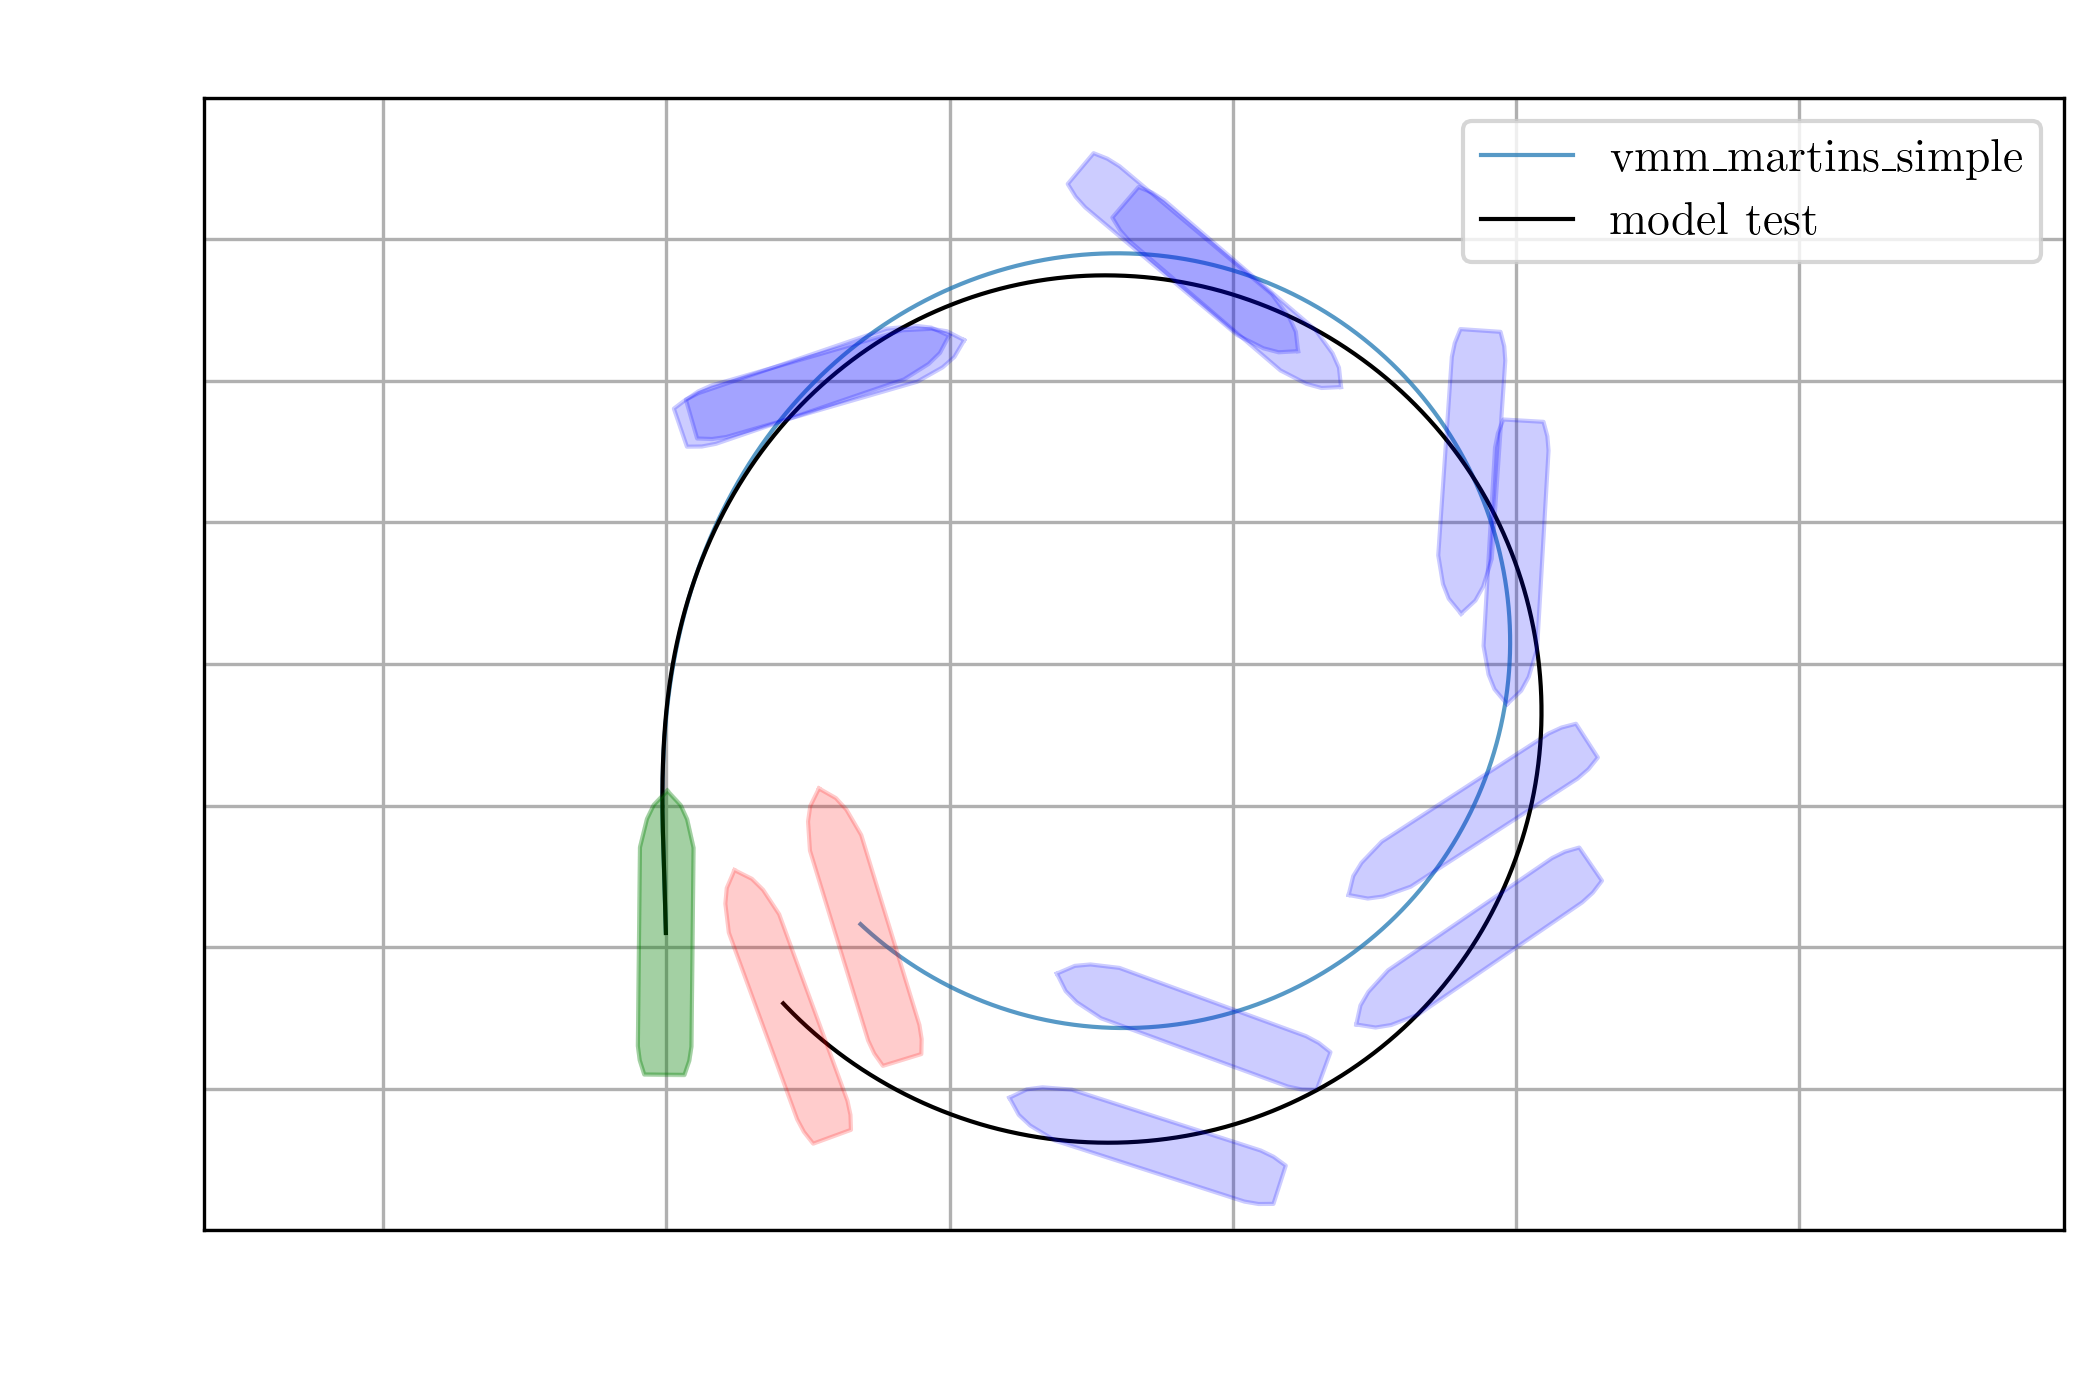

In [19]:
fig = track_plots(dataframes, lpp=ship_data['L'], beam=ship_data['B'], plot_boats=True, styles=styles, N=7);
fig.axes.set_xlim(-1,17.5)
fig.axes.set_ylim(5,25)
